### Neural Network Modelling

### Import relevant libraries and datasets

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from joblib import dump, load

2024-04-25 20:40:44.501601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('../../Data/processed/weatherAUS_imputed.csv')
display(df.head())

,Date,Location,Year,Month,RainToday,RainTomorrow,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindGustDir_angle,Latitude,Longitude,Cloud,Pressure,Temperature,Humidity,temp_fluctuation
0,2009-01-01,Cobar,2009,1,0.0,0.0,-0.254034,1.452543,1.231645,0.544048,0.367568,-0.016581,0.134517,-0.346762,-1.566909,1.483789,-2.239319,1.266185
1,2009-01-02,Cobar,2009,1,0.0,0.0,-0.254034,2.092290,1.417426,-0.274399,0.142577,-0.016581,0.134517,-1.337620,-0.534263,0.523016,-2.103988,-0.123978
2,2009-01-03,Cobar,2009,1,0.0,0.0,-0.254034,1.589632,1.497046,-0.795229,-0.307405,-0.016581,0.134517,-1.337620,-0.664246,1.892307,-2.753579,1.531952
3,2009-01-04,Cobar,2009,1,0.0,0.0,-0.254034,1.178365,0.780464,0.395239,-1.432358,-0.016581,0.134517,-0.346762,-0.787008,1.756134,-1.400263,1.450178
4,2009-01-05,Cobar,2009,1,0.0,0.0,-0.254034,1.315454,1.205105,-0.720824,1.267530,-0.016581,0.134517,-0.544934,-0.765344,1.839351,-1.535595,1.102637


In [3]:
#confusion matrix, classification report
def confusion_matrix_classification_report(model):
    pred_prob = model.predict(X_test) > 0.5
    pred = (pred_prob > 0.5).astype(int)
    mat = confusion_matrix(y_test, pred)
    labels = ['True', 'False']
 
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    
    print(classification_report(y_test, pred))

In [4]:
#training and validation accuracy plot
def training_validation_accuracy_plot(history):
    acc = history.history['accuracy']
    val = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, '-', label='Training accuracy')
    plt.plot(epochs, val, ':', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.plot()

### Neural Network Classification

### 1. Without any over oder undersampling

### 1.1 Baseline Neural Network

In [15]:
data = df.drop(columns=['RainTomorrow', 'Location', 'Date'])
target = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, stratify=target)

In [16]:
baseline_model = Sequential()
baseline_model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))
baseline_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [17]:
training_history1 = baseline_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
542/542 [==============================] - 1s 2ms/step - loss: 93.4864 - accuracy: 0.5083 - val_loss: 0.4684 - val_accuracy: 0.7906
Epoch 2/20
542/542 [==============================] - 1s 1ms/step - loss: 0.4050 - accuracy: 0.8216 - val_loss: 0.3719 - val_accuracy: 0.8321
Epoch 3/20
542/542 [==============================] - 1s 2ms/step - loss: 0.3662 - accuracy: 0.8384 - val_loss: 0.3557 - val_accuracy: 0.8426
Epoch 4/20
542/542 [==============================] - 1s 1ms/step - loss: 0.3588 - accuracy: 0.8415 - val_loss: 0.3484 - val_accuracy: 0.8467
Epoch 5/20
542/542 [==============================] - 1s 1ms/step - loss: 0.3556 - accuracy: 0.8431 - val_loss: 0.3446 - val_accuracy: 0.8484
Epoch 6/20
542/542 [==============================] - 1s 2ms/step - loss: 0.3518 - accuracy: 0.8430 - val_loss: 0.3413 - val_accuracy: 0.8508
Epoch 7/20
542/542 [==============================] - 1s 1ms/step - loss: 0.3554 - accuracy: 0.8434 - val_loss: 0.3387 - val_accuracy: 0.8521
Epoch

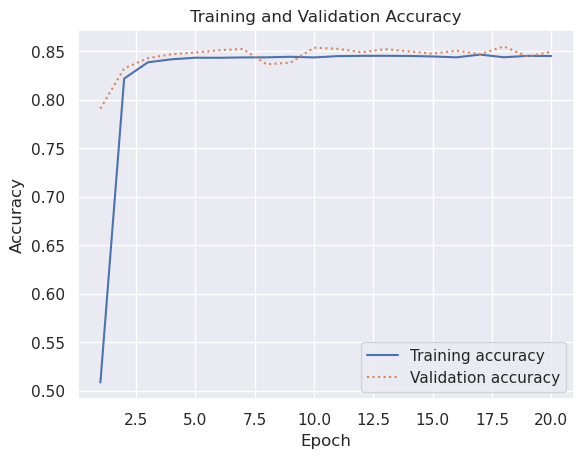

In [18]:
training_validation_accuracy_plot(training_history1)

424/424 [==============================] - 0s 518us/step
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     10652
         1.0       0.78      0.41      0.54      2893

    accuracy                           0.85     13545
   macro avg       0.82      0.69      0.72     13545
weighted avg       0.84      0.85      0.83     13545



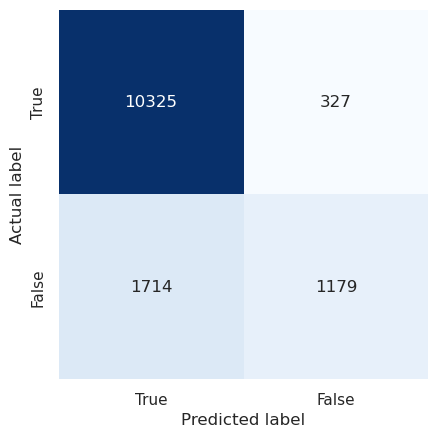

In [19]:
confusion_matrix_classification_report(baseline_model)

### 1.2 Adding more layers 

In [27]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [28]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
training_history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100)

Epoch 1/20
542/542 [==============================] - 3s 4ms/step - loss: 1.7855 - accuracy: 0.7774 - val_loss: 0.3535 - val_accuracy: 0.8482
Epoch 2/20
542/542 [==============================] - 2s 4ms/step - loss: 0.6258 - accuracy: 0.7919 - val_loss: 1.2509 - val_accuracy: 0.7869
Epoch 3/20
542/542 [==============================] - 2s 4ms/step - loss: 0.4796 - accuracy: 0.8105 - val_loss: 0.3756 - val_accuracy: 0.8304
Epoch 4/20
542/542 [==============================] - 2s 3ms/step - loss: 0.5049 - accuracy: 0.8083 - val_loss: 0.4914 - val_accuracy: 0.8236
Epoch 5/20
542/542 [==============================] - 3s 5ms/step - loss: 0.5104 - accuracy: 0.8065 - val_loss: 0.4064 - val_accuracy: 0.8409
Epoch 6/20
542/542 [==============================] - 2s 3ms/step - loss: 0.4667 - accuracy: 0.8157 - val_loss: 0.9826 - val_accuracy: 0.5682
Epoch 7/20
542/542 [==============================] - 2s 4ms/step - loss: 0.4609 - accuracy: 0.8168 - val_loss: 0.5597 - val_accuracy: 0.7417
Epoch 

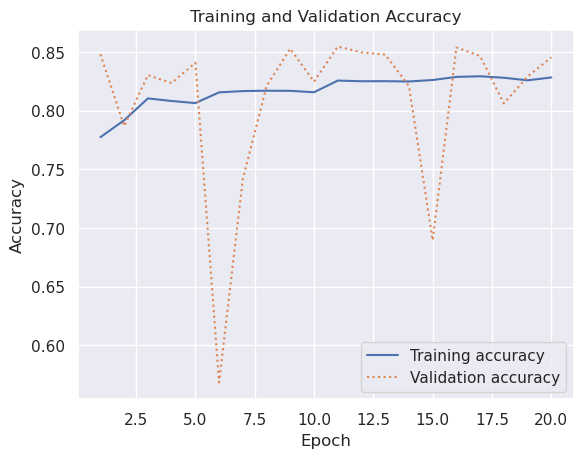

In [30]:
training_validation_accuracy_plot(training_history2)

424/424 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90     10652
         1.0       0.63      0.66      0.65      2893

    accuracy                           0.85     13545
   macro avg       0.77      0.78      0.77     13545
weighted avg       0.85      0.85      0.85     13545



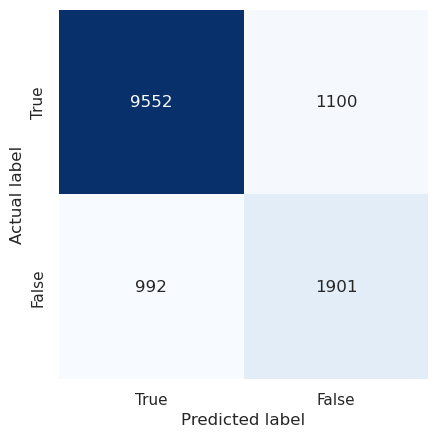

In [31]:
confusion_matrix_classification_report(model2)

### 1.3 GridSearch

In [47]:
def build_classifier(learn_rate):
    # Initialising the DNN
    classifier = Sequential()
    classifier.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    classifier.add(Dense(64, activation='relu'))
    classifier.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=learn_rate)
    classifier.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return classifier


In [87]:
"""
classifier = KerasClassifier(build_fn = build_classifier)

# grid search epochs, batch size and optimizer
epochs = [10]
batches = [100]
lr=[0.3,0.2,0.1, 0.03, 0.02, 0.01]
param_grid = dict(epochs=epochs, batch_size=batches, learn_rate=lr)
grid = GridSearchCV(estimator=classifier, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
"""

'\nclassifier = KerasClassifier(build_fn = build_classifier)\n\n# grid search epochs, batch size and optimizer\nepochs = [10]\nbatches = [100]\nlr=[0.3,0.2,0.1, 0.03, 0.02, 0.01]\nparam_grid = dict(epochs=epochs, batch_size=batches, learn_rate=lr)\ngrid = GridSearchCV(estimator=classifier, param_grid=param_grid)\ngrid_result = grid.fit(X_train, y_train)\n\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\n'

In [49]:
#dump(grid_result.best_params_, 'grid_dnn.joblib')

['grid_dnn.joblib']

In [50]:
grid_dnn = load('grid_dnn.joblib')

In [86]:
grid_dnn

{'batch_size': 100, 'epochs': 10, 'learn_rate': 0.03}

### 1.4 Model with best parameters

In [52]:
model_best = build_classifier(0.03)

In [53]:
training_history_best = model_best.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=200)

Epoch 1/300
271/271 [==============================] - 2s 5ms/step - loss: 10.5621 - accuracy: 0.7950 - val_loss: 0.3565 - val_accuracy: 0.8442
Epoch 2/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3608 - accuracy: 0.8395 - val_loss: 0.3402 - val_accuracy: 0.8515
Epoch 3/300
271/271 [==============================] - 1s 5ms/step - loss: 0.3566 - accuracy: 0.8415 - val_loss: 0.3487 - val_accuracy: 0.8514
Epoch 4/300
271/271 [==============================] - 1s 5ms/step - loss: 0.3567 - accuracy: 0.8426 - val_loss: 0.3379 - val_accuracy: 0.8522
Epoch 5/300
271/271 [==============================] - 1s 4ms/step - loss: 0.3588 - accuracy: 0.8407 - val_loss: 0.3631 - val_accuracy: 0.8447
Epoch 6/300
271/271 [==============================] - 2s 6ms/step - loss: 0.3571 - accuracy: 0.8418 - val_loss: 0.3499 - val_accuracy: 0.8448
Epoch 7/300
271/271 [==============================] - 1s 5ms/step - loss: 0.3521 - accuracy: 0.8432 - val_loss: 0.3453 - val_accuracy: 0.845

Epoch 58/300
271/271 [==============================] - 1s 4ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5189 - val_accuracy: 0.7864
Epoch 59/300
271/271 [==============================] - 1s 4ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5188 - val_accuracy: 0.7864
Epoch 60/300
271/271 [==============================] - 1s 4ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5187 - val_accuracy: 0.7864
Epoch 61/300
271/271 [==============================] - 1s 4ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5188 - val_accuracy: 0.7864
Epoch 62/300
271/271 [==============================] - 1s 4ms/step - loss: 0.5189 - accuracy: 0.7864 - val_loss: 0.5187 - val_accuracy: 0.7864
Epoch 63/300
271/271 [==============================] - 1s 4ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5189 - val_accuracy: 0.7864
Epoch 64/300
271/271 [==============================] - 1s 5ms/step - loss: 0.5189 - accuracy: 0.7864 - val_loss: 0.5190 - val_accuracy:

Epoch 115/300
271/271 [==============================] - 2s 6ms/step - loss: 0.5189 - accuracy: 0.7864 - val_loss: 0.5187 - val_accuracy: 0.7864
Epoch 116/300
271/271 [==============================] - 1s 5ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5194 - val_accuracy: 0.7864
Epoch 117/300
271/271 [==============================] - 1s 5ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5187 - val_accuracy: 0.7864
Epoch 118/300
271/271 [==============================] - 1s 4ms/step - loss: 0.5190 - accuracy: 0.7864 - val_loss: 0.5187 - val_accuracy: 0.7864
Epoch 119/300
271/271 [==============================] - 1s 5ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5193 - val_accuracy: 0.7864
Epoch 120/300
271/271 [==============================] - 2s 6ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5187 - val_accuracy: 0.7864
Epoch 121/300
271/271 [==============================] - 2s 6ms/step - loss: 0.5189 - accuracy: 0.7864 - val_loss: 0.5187 - val_ac

271/271 [==============================] - 1s 5ms/step - loss: 0.5189 - accuracy: 0.7864 - val_loss: 0.5189 - val_accuracy: 0.7864
Epoch 228/300
271/271 [==============================] - 2s 7ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5191 - val_accuracy: 0.7864
Epoch 229/300
271/271 [==============================] - 1s 5ms/step - loss: 0.5187 - accuracy: 0.7864 - val_loss: 0.5187 - val_accuracy: 0.7864
Epoch 230/300
271/271 [==============================] - 2s 6ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5188 - val_accuracy: 0.7864
Epoch 231/300
271/271 [==============================] - 2s 7ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5188 - val_accuracy: 0.7864
Epoch 232/300
271/271 [==============================] - 1s 5ms/step - loss: 0.5188 - accuracy: 0.7864 - val_loss: 0.5204 - val_accuracy: 0.7864
Epoch 233/300
271/271 [==============================] - 2s 7ms/step - loss: 0.5191 - accuracy: 0.7864 - val_loss: 0.5187 - val_accuracy: 0.7864

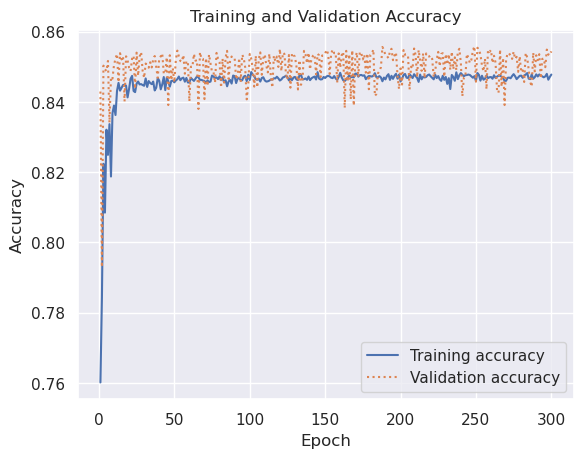

In [20]:
training_validation_accuracy_plot(training_history_best)

424/424 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     10652
         1.0       0.74      0.48      0.59      2893

    accuracy                           0.85     13545
   macro avg       0.81      0.72      0.75     13545
weighted avg       0.84      0.85      0.84     13545



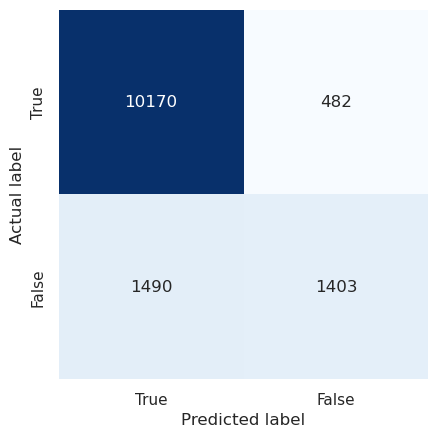

In [19]:
confusion_matrix_classification_report(model_best)

The models we got so far seem quite unstable. This is certainly due the stochastic nature of the model, i.e stochastic gradient descent introduced randomness through mini-batch sampling which can cause the optimization process to converge to different local minima. This seems to be the case for our models. 

Let's see a) if random oversampling, b) adding a Dropout and b) adding more layers solves part of the problem. 

### 2. Over and under sampling with Dropout

In [66]:
model_sampling = Sequential()
model_sampling.add(Dense(128, input_dim=X_train_ros.shape[1], activation='relu', name='Dense1'))
model_sampling.add(Dropout(0.25, name='Dropout1'))
model_sampling.add(Dense(128, activation='relu', name='Dense2'))
model_sampling.add(Dropout(0.25, name='Dropout2'))
model_sampling.add(Dense(64, activation='relu', name='Dense3'))
model_sampling.add(Dropout(0.25, name='Dropout3'))
model_sampling.add(Dense(64, activation='relu', name='Dense4'))
model_sampling.add(Dropout(0.25, name='Dropout4'))
model_sampling.add(Dense(32, activation='relu', name='Dense5'))
model_sampling.add(Dropout(0.25, name='Dropout5'))
model_sampling.add(Dense(1, activation='sigmoid', name='Dense6'))
opt = Adam(learning_rate=0.03)
model_sampling.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_sampling.summary()

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 128)               2048      
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                                 
 Dense2 (Dense)              (None, 128)               16512     
                                                                 
 Dropout2 (Dropout)          (None, 128)               0         
                                                                 
 Dense3 (Dense)              (None, 64)                8256      
                                                                 
 Dropout3 (Dropout)          (None, 64)                0         
                                                                 
 Dense4 (Dense)              (None, 64)              

### 2.1 Random Oversampling with Dropout

In [67]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)

In [68]:
training_history_ros = model_sampling.fit(X_train_ros, y_train_ros, validation_data=(X_test, y_test), epochs=100, 
                                 batch_size=200)

Epoch 1/100
427/427 [==============================] - 4s 8ms/step - loss: 2.3691 - accuracy: 0.4957 - val_loss: 0.6864 - val_accuracy: 0.7864
Epoch 2/100
427/427 [==============================] - 3s 7ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6777 - val_accuracy: 0.7864
Epoch 3/100
427/427 [==============================] - 4s 9ms/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 0.6707 - val_accuracy: 0.7864
Epoch 4/100
427/427 [==============================] - 3s 8ms/step - loss: 0.6934 - accuracy: 0.4992 - val_loss: 0.6799 - val_accuracy: 0.7864
Epoch 5/100
427/427 [==============================] - 3s 8ms/step - loss: 0.6935 - accuracy: 0.5012 - val_loss: 0.6510 - val_accuracy: 0.7864
Epoch 6/100
427/427 [==============================] - 3s 8ms/step - loss: 0.6934 - accuracy: 0.5012 - val_loss: 0.7088 - val_accuracy: 0.2136
Epoch 7/100
427/427 [==============================] - 3s 8ms/step - loss: 0.6935 - accuracy: 0.4980 - val_loss: 0.6858 - val_accuracy: 0.7864

Epoch 58/100
427/427 [==============================] - 4s 10ms/step - loss: 0.6935 - accuracy: 0.5002 - val_loss: 0.6985 - val_accuracy: 0.2136
Epoch 59/100
427/427 [==============================] - 4s 10ms/step - loss: 0.6934 - accuracy: 0.5004 - val_loss: 0.7124 - val_accuracy: 0.2136
Epoch 60/100
427/427 [==============================] - 4s 10ms/step - loss: 0.6934 - accuracy: 0.5005 - val_loss: 0.7017 - val_accuracy: 0.2136
Epoch 61/100
427/427 [==============================] - 4s 9ms/step - loss: 0.6932 - accuracy: 0.5038 - val_loss: 0.6914 - val_accuracy: 0.7864
Epoch 62/100
427/427 [==============================] - 3s 8ms/step - loss: 0.6935 - accuracy: 0.4984 - val_loss: 0.7019 - val_accuracy: 0.2136
Epoch 63/100
427/427 [==============================] - 4s 9ms/step - loss: 0.6934 - accuracy: 0.4976 - val_loss: 0.6956 - val_accuracy: 0.2136
Epoch 64/100
427/427 [==============================] - 5s 13ms/step - loss: 0.6934 - accuracy: 0.5017 - val_loss: 0.6975 - val_accur

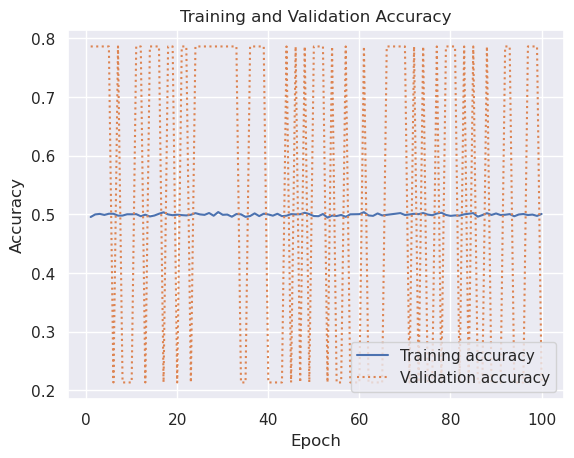

In [69]:
training_validation_accuracy_plot(training_history_ros)

424/424 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     10652
         1.0       0.21      1.00      0.35      2893

    accuracy                           0.21     13545
   macro avg       0.11      0.50      0.18     13545
weighted avg       0.05      0.21      0.08     13545



/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


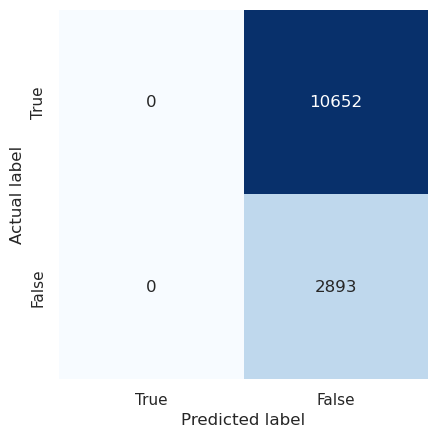

In [70]:
confusion_matrix_classification_report(model_ros)

###  2.2 SMOTE with Dropout 

In [71]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [72]:
training_history_sm = model_sampling.fit(X_train_sm, y_train_sm, validation_data=(X_test, y_test), epochs=100, 
                                 batch_size=200)

Epoch 1/100
427/427 [==============================] - 4s 10ms/step - loss: 0.6935 - accuracy: 0.4974 - val_loss: 0.6892 - val_accuracy: 0.7864
Epoch 2/100
427/427 [==============================] - 4s 10ms/step - loss: 0.6933 - accuracy: 0.5022 - val_loss: 0.6944 - val_accuracy: 0.2136
Epoch 3/100
427/427 [==============================] - 6s 13ms/step - loss: 0.6933 - accuracy: 0.5012 - val_loss: 0.7078 - val_accuracy: 0.2136
Epoch 4/100
427/427 [==============================] - 5s 11ms/step - loss: 0.6934 - accuracy: 0.4994 - val_loss: 0.7044 - val_accuracy: 0.2136
Epoch 5/100
427/427 [==============================] - 4s 10ms/step - loss: 0.6934 - accuracy: 0.4997 - val_loss: 0.6983 - val_accuracy: 0.2136
Epoch 6/100
427/427 [==============================] - 4s 10ms/step - loss: 0.6934 - accuracy: 0.4990 - val_loss: 0.7083 - val_accuracy: 0.2136
Epoch 7/100
427/427 [==============================] - 5s 12ms/step - loss: 0.6934 - accuracy: 0.4989 - val_loss: 0.6870 - val_accuracy:

Epoch 58/100
427/427 [==============================] - 3s 7ms/step - loss: 0.6934 - accuracy: 0.4979 - val_loss: 0.6894 - val_accuracy: 0.7864
Epoch 59/100
427/427 [==============================] - 3s 7ms/step - loss: 0.6934 - accuracy: 0.4997 - val_loss: 0.7113 - val_accuracy: 0.2136
Epoch 60/100
427/427 [==============================] - 4s 9ms/step - loss: 0.6934 - accuracy: 0.5006 - val_loss: 0.6966 - val_accuracy: 0.2136
Epoch 61/100
427/427 [==============================] - 6s 13ms/step - loss: 0.6934 - accuracy: 0.4979 - val_loss: 0.7027 - val_accuracy: 0.2136
Epoch 62/100
427/427 [==============================] - 3s 7ms/step - loss: 0.6934 - accuracy: 0.4999 - val_loss: 0.6917 - val_accuracy: 0.7864
Epoch 63/100
427/427 [==============================] - 5s 11ms/step - loss: 0.6934 - accuracy: 0.4994 - val_loss: 0.7039 - val_accuracy: 0.2136
Epoch 64/100
427/427 [==============================] - 5s 11ms/step - loss: 0.6934 - accuracy: 0.5019 - val_loss: 0.7076 - val_accura

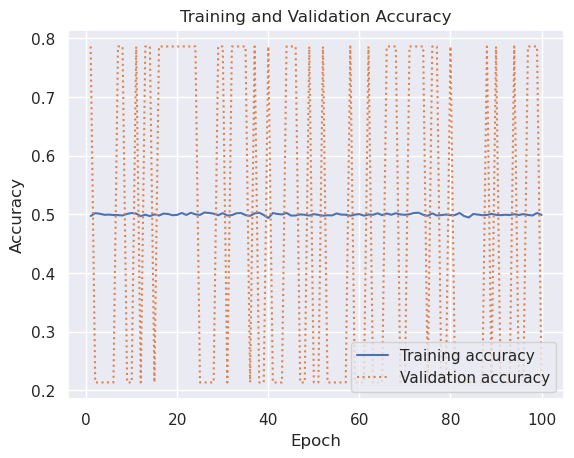

In [73]:
training_validation_accuracy_plot(training_history_sm)

424/424 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     10652
         1.0       0.21      1.00      0.35      2893

    accuracy                           0.21     13545
   macro avg       0.11      0.50      0.18     13545
weighted avg       0.05      0.21      0.08     13545



/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


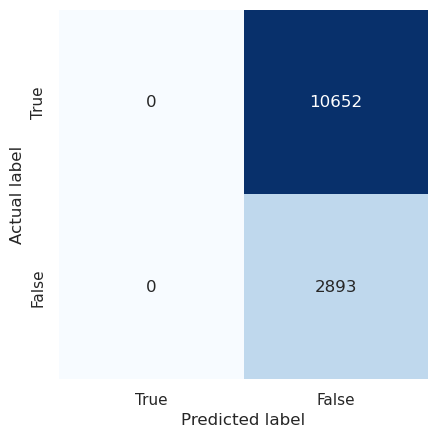

In [74]:
confusion_matrix_classification_report(model_sampling)

### 2.3 Random Oversampling with Dropout

In [76]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

In [ ]:
training_history_rus = model_sampling.fit(X_train_rus, y_train_rus, validation_data=(X_test, y_test), epochs=100, 
                                 batch_size=200)

In [ ]:
training_validation_accuracy_plot(training_history_rus)

In [ ]:
confusion_matrix_classification_report(model_sampling)

### 3. Model with Dropout, no over or undersampling 

In [ ]:
model4 = Sequential()
model4.add(Dense(128, input_dim=X_train.shape[1], activation='relu', name='Dense1'))
model_ros.add(Dropout(0.25))
model4.add(Dense(128, activation='relu', name='Dense2'))
model_ros.add(Dropout(0.25, name='Dropout1'))
model4.add(Dense(64, activation='relu', name='Dense3'))
model_ros.add(Dropout(0.25, name='Dropout2'))
model4.add(Dense(64, activation='relu', name='Dense4'))
model_ros.add(Dropout(0.25, name='Dropout3'))
model4.add(Dense(32, activation='relu', name='Dense5'))
model_ros.add(Dropout(0.25, name='Dropout4'))
model4.add(Dense(1, activation='sigmoid', name='Dense6'))
model_ros.add(Dropout(0.25, name='Dropout5'))
opt = Adam(learning_rate=0.05)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model4.summary()

In [ ]:
training_history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200)

In [ ]:
training_validation_accuracy_plot(training_history4)

In [ ]:
confusion_matrix_classification_report(model4)

### 4. Early Stopping and Batch Normalization

In [88]:
model5 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # input layer
    BatchNormalization(),
    Dropout(0.25),  # dropout layer with 50% dropout rate
    Dense(32, activation='relu'),  # hidden layer
    BatchNormalization(),
    Dropout(0.25),  # dropout layer with 50% dropout rate
    Dense(1, activation='sigmoid')  # output layer with sigmoid activation for binary classification
])

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_205 (Dense)           (None, 64)                1024      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_206 (Dense)           (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_44 (Dropout)        (None, 32)              

In [89]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)

In [90]:
training_history5 = model5.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1355/1355 [==============================] - 6s 3ms/step - loss: 0.4150 - accuracy: 0.8114 - val_loss: 0.8640 - val_accuracy: 0.7902
Epoch 2/100
1355/1355 [==============================] - 5s 4ms/step - loss: 0.3619 - accuracy: 0.8379 - val_loss: 0.9084 - val_accuracy: 0.5391
Epoch 3/100
1355/1355 [==============================] - 5s 4ms/step - loss: 0.3547 - accuracy: 0.8428 - val_loss: 0.3475 - val_accuracy: 0.8495
Epoch 4/100
1355/1355 [==============================] - 5s 4ms/step - loss: 0.3551 - accuracy: 0.8397 - val_loss: 5.7020 - val_accuracy: 0.7879
Epoch 5/100
1355/1355 [==============================] - 5s 4ms/step - loss: 0.3539 - accuracy: 0.8436 - val_loss: 1.1977 - val_accuracy: 0.7879
Epoch 6/100
1355/1355 [==============================] - 6s 4ms/step - loss: 0.3538 - accuracy: 0.8433 - val_loss: 7.9366 - val_accuracy: 0.7879
Epoch 7/100
1355/1355 [==============================] - 5s 4ms/step - loss: 0.3509 - accuracy: 0.8443 - val_loss: 1.8806 - val_ac

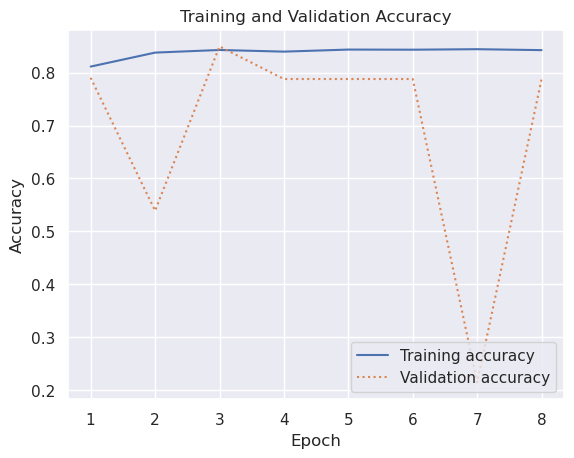

In [91]:
training_validation_accuracy_plot(training_history5)

424/424 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     10652
         1.0       0.73      0.46      0.57      2893

    accuracy                           0.85     13545
   macro avg       0.80      0.71      0.74     13545
weighted avg       0.84      0.85      0.84     13545



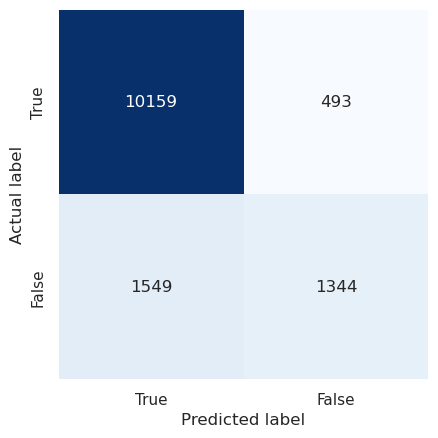

In [92]:
confusion_matrix_classification_report(model5)

### 5. Learning Rate Scheduling

In [77]:
model6 = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # input layer
    Dropout(0.25),  # dropout layer with 50% dropout rate
    Dense(32, activation='relu'),  # hidden layer
    Dropout(0.25),  # dropout layer with 50% dropout rate
    Dense(1, activation='sigmoid')  # output layer with sigmoid activation for binary classification
])

In [78]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced by a factor of 0.1 after every 10 epochs.
    """
    learning_rate = 0.01
    if 20 > epoch > 10:
        learning_rate *= 0.03
    if epoch >= 20:
        learning_rate *= 0.05
    return learning_rate

In [79]:
# Compile the model
opt = Adam(learning_rate=0.01)
model6.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model6.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_199 (Dense)           (None, 64)                1024      
                                                                 
 dropout_39 (Dropout)        (None, 64)                0         
                                                                 
 dense_200 (Dense)           (None, 32)                2080      
                                                                 
 dropout_40 (Dropout)        (None, 32)                0         
                                                                 
 dense_201 (Dense)           (None, 1)                 33        
                                                                 
Total params: 3,137
Trainable params: 3,137
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Define the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with learning rate scheduling
training_history6 = model6.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping,lr_scheduler])

Epoch 1/100
1355/1355 [==============================] - 5s 4ms/step - loss: 1.1347 - accuracy: 0.7819 - val_loss: 0.5169 - val_accuracy: 0.7879 - lr: 0.0100
Epoch 2/100
1355/1355 [==============================] - 6s 4ms/step - loss: 0.5206 - accuracy: 0.7859 - val_loss: 0.5168 - val_accuracy: 0.7879 - lr: 0.0100
Epoch 3/100
1355/1355 [==============================] - 4s 3ms/step - loss: 0.5195 - accuracy: 0.7860 - val_loss: 0.5168 - val_accuracy: 0.7879 - lr: 0.0100
Epoch 4/100
1355/1355 [==============================] - 6s 4ms/step - loss: 0.5203 - accuracy: 0.7860 - val_loss: 0.5172 - val_accuracy: 0.7879 - lr: 0.0100
Epoch 5/100
1355/1355 [==============================] - 5s 4ms/step - loss: 0.5218 - accuracy: 0.7860 - val_loss: 0.5169 - val_accuracy: 0.7879 - lr: 0.0100
Epoch 6/100
1355/1355 [==============================] - 5s 4ms/step - loss: 0.5195 - accuracy: 0.7860 - val_loss: 0.5167 - val_accuracy: 0.7879 - lr: 0.0100
Epoch 7/100
1355/1355 [=============================

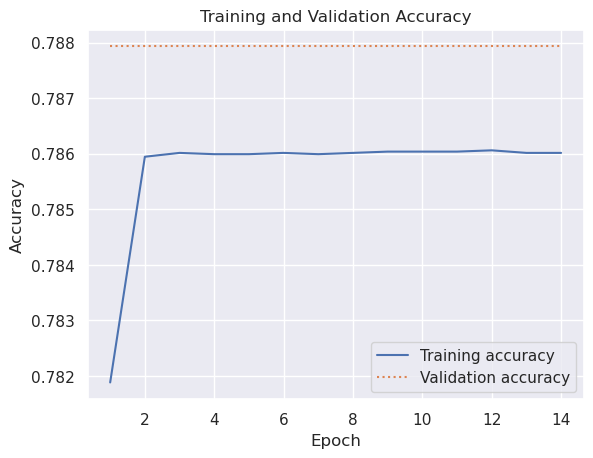

In [84]:
training_validation_accuracy_plot(training_history6)

424/424 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88     10652
         1.0       0.00      0.00      0.00      2893

    accuracy                           0.79     13545
   macro avg       0.39      0.50      0.44     13545
weighted avg       0.62      0.79      0.69     13545



/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/claudia/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


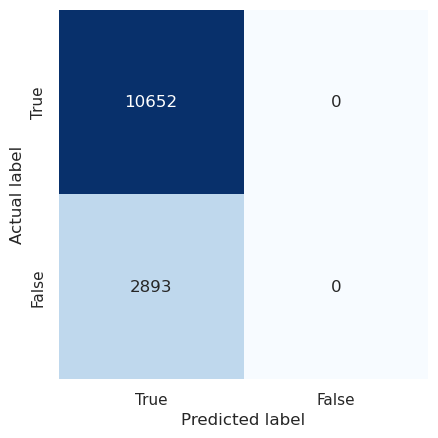

In [85]:
confusion_matrix_classification_report(model6)

### 6. Conclusion

The Neural Network Model does not perform well. It is unstable and gives low precision and recall scores no matter the number of epoch or batch_size. Different learning rates also do no seem to give a better result, nor does increasing the number of layers. It seems that the Gradient Descent converges to different local minima, meaning that the function we are trying to minimize is not convex and the algorithm becomes unpredictable. 

Unfortunately, the gradient descent algorithm is one of the only algorithms that can be used in practice because it is the only efficient optimization algorithm given our computational capabilities.